In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

np.random.seed(1337)

In [2]:
#read data
data_dict = {}
f = h5py.File("dataset/nyu_depth_v2_labeled.mat")
for k, v in tqdm(f.items()):
    data_dict[k] = np.array(v)

  0%|          | 0/14 [00:00<?, ?it/s]

In [3]:
# seperate depths and images from dict
depths = data_dict['depths']
images = data_dict['images']

#Images seem to be rotated 90 degrees. Permute axes to fix rotation
depths = depths.transpose((0, 2, 1))
images = images.transpose((0, 3, 2, 1))

#random shuffle images
shuffle_idx = np.random.permutation(depths.shape[0])
depths = depths[shuffle_idx]
images = images[shuffle_idx]

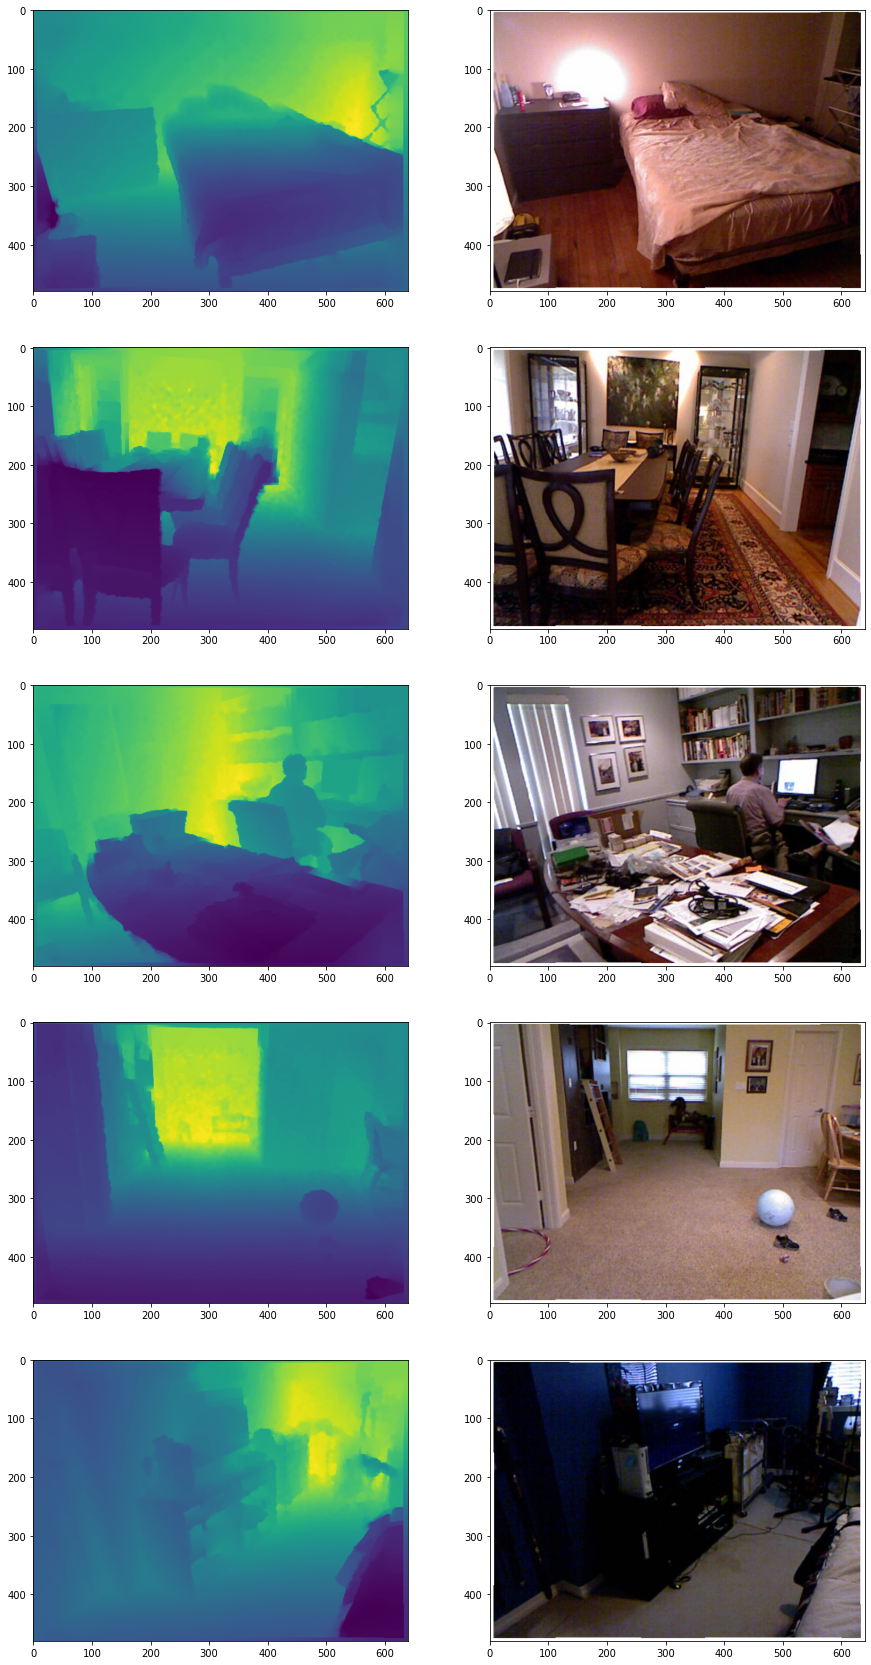

In [4]:
#visualize first 5 samples
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
for i,ax in enumerate(axes):
    ax[0].imshow(depths[i])
    ax[1].imshow(images[i])

In [5]:
#split data into Train - Val - test
n_samples = depths.shape[0]
n_70 = n_samples * 70 // 100
n_90 = n_samples * 90 // 100

#train
X_train = images[:n_70]
Y_train = depths[:n_70]

#validation
X_val = images[n_70 : n_90]
Y_val = depths[n_70 : n_90]

#test
X_test = images[n_90:]
Y_test = depths[n_90:]

In [ ]:
#Save processed data
# X
np.save("dataset/x_train.npy", X_train)
np.save("dataset/x_val.npy", X_val)
np.save("dataset/x_test.npy", X_test)

# Y
np.save("dataset/y_train.npy", Y_train)
np.save("dataset/y_val.npy", Y_val)
np.save("dataset/y_test.npy", Y_test)